In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter, FuncFormatter
from typing import List, Tuple
from pathlib import Path

assets = Path('assets')
assets.mkdir(exist_ok=True)

In [2]:
# Custom tick formatter function
def format_bytes(x, pos):
    suffixes = ['B', 'KB', 'MB', 'GB', "TB"]
    index = 0
    while x >= 1000 and index < len(suffixes) - 1:
        x /= 1024
        index += 1
    return f"{x:.2f} {suffixes[index]}"

def format_identity(x, pos):
    return str(int(x))

In [3]:
def display(log_path, _x, y, t, high_light: List[int]=None, formatter=format_bytes, log=True, marker="o", x_map=None):
    with open(log_path + ".txt") as f:
        lines = [[float(x) for x in y.split("|")] for y in f.readlines()]
    lines = np.array(lines)

    fig = plt.figure(figsize=(10, 5))

    if x_map is not None:
        lines[:, 0] = [x_map(x) for x in lines[:, 0]]
        print(lines[:, 0])

    plt.plot(lines[:, 0], lines[:, 1], marker=marker)
    if log:
        plt.xscale("log")
    plt.xticks(lines[:, 0].tolist())
    if formatter is not None:
        plt.gca().xaxis.set_major_formatter(formatter)
    # rotate xticks
    plt.xticks(rotation=75)
    # hide small ticks
    plt.tick_params(axis='x', which='minor', bottom=False)

    if high_light is not None:
        for x in high_light:
            plt.axvline(x=x, color="red", linestyle="--")
    
    plt.xlabel(_x)
    plt.ylabel(y)
    plt.title(t)
    plt.savefig(assets / f"{log_path}.png", bbox_inches='tight')
    plt.show()

In [4]:
def display_multi(log_path, _x, y, t, high_light: List[int]=None, formatter=format_bytes, log=True, marker="o"):
    with open(log_path + ".txt") as f:
        bare = f.read().split("-\n")[1:]
    groups = {}
    for lines in bare:
        splitted_lines = lines.split("\n")
        splitted_lines = [x for x in splitted_lines if x]
        # print("Bare", splitted_lines)
        groups[splitted_lines[0]] = np.array([[float(x) for x in y.split("|")] for y in splitted_lines[1:] if y])

    # print(groups)

    fig = plt.figure(figsize=(17, 7))
    for k, lines in groups.items():
        plt.plot(lines[:, 0], lines[:, 1], marker=marker, label=str(k))
    if log:
        plt.xscale("log")
    plt.xticks(lines[:, 0].tolist())
    if formatter is not None:
        plt.gca().xaxis.set_major_formatter(formatter)

    # rotate xticks
    plt.xticks(rotation=75)
    # hide small ticks
    plt.tick_params(axis='x', which='minor', bottom=False)

    if high_light is not None:
        for x in high_light:
            plt.axvline(x=x, color="red", linestyle="--")

    plt.xlabel(_x)
    plt.ylabel(y)
    plt.title(t)
    plt.legend()
    fig.savefig(assets / f"{log_path}.png", bbox_inches='tight')
    plt.show()

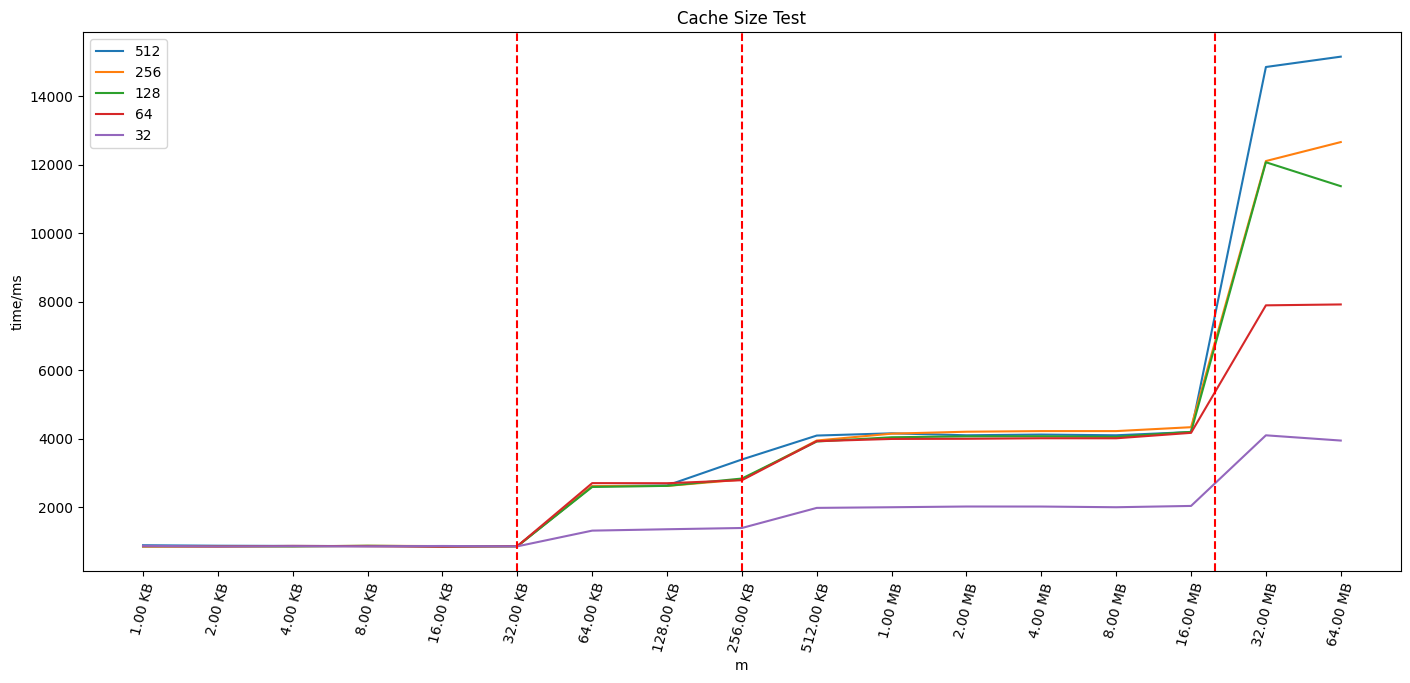

In [5]:
display_multi("result_cache_size", "m", "time/ms", "Cache Size Test", [
    32 * 1024, 
    256 * 1024,
    20 * 1024 * 1024
], marker=None)

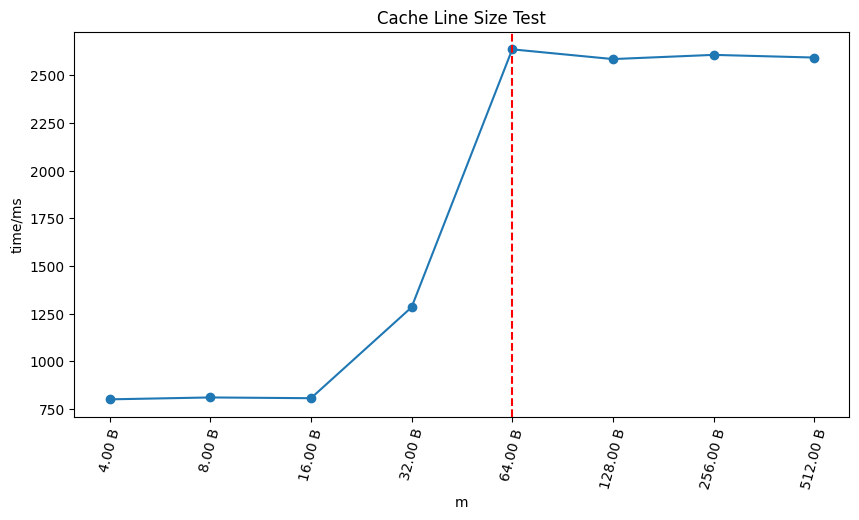

In [6]:
display("result_cache_line_size", "m", "time/ms", "Cache Line Size Test", [64])

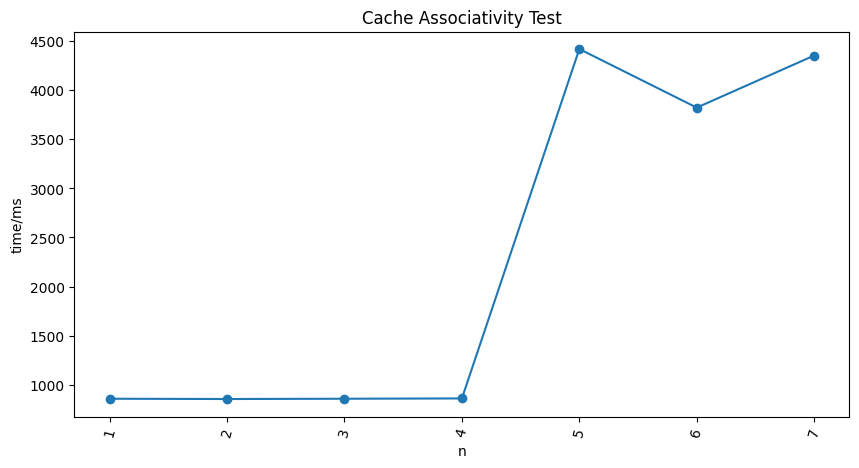

In [7]:
display("result_cache_associativity", "n", "time/ms", "Cache Associativity Test", formatter=format_identity, log=False)